### 1. Acquire data from the cloud database.
You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.
Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value

In [1]:
#imports
import pandas as pd
import numpy as np
import env
import os
import wrangle
import wrangle_mall
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
#display all columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
#acquire file
zillow = wrangle.wrangle_zillow()

Using cached data


In [5]:
zillow.head()

,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingclassdesc,buildingqualitytypeid,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,fireplaceflag,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,propertycountylandusecode,propertylandusetypeid,propertylandusedesc,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,roomcnt,threequarterbathnbr,typeconstructiontypeid,typeconstructiondesc,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,NaN,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,3100.0,6059.0,NaN,NaN,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,122,261.0,Single Family Residential,NaN,6.059063e+07,53571.0,1286.0,NaN,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1465.0,6111.0,1.0,NaN,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,1110,261.0,Single Family Residential,NaN,6.111001e+07,13091.0,2061.0,NaN,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,14186244,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,1243.0,6059.0,NaN,NaN,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,122,261.0,Single Family Residential,NaN,6.059022e+07,21412.0,1286.0,NaN,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,12177905,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,8.0,NaN,2376.0,6037.0,NaN,NaN,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,0101,261.0,Single Family Residential,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,0.0,NaN,NaN,NaN,1.0,1970.0,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
4,10887214,1.0,Central,NaN,NaN,3.0,3.0,NaN,NaN,8.0,NaN,1312.0,6037.0,NaN,NaN,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,010C,266.0,Condominium,LAR3,6.037124e+07,12447.0,3101.0,268548.0,0.0,NaN,NaN,NaN,1.0,1964.0,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01


#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [6]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77379
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77380 non-null  int64  
 1   airconditioningtypeid         24953 non-null  float64
 2   airconditioningdesc           24953 non-null  object 
 3   architecturalstyletypeid      206 non-null    float64
 4   architecturalstyledesc        206 non-null    object 
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingclassdesc             15 non-null     object 
 9   buildingqualitytypeid         49671 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  calculatedfinishedsquarefeet  77184 non-null  float64
 12  fips                          77380 non-null  float64
 13  f

In [7]:
zillow.shape

(77380, 46)

In [8]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77380.0,1.300715e+07,3.481368e+06,1.071186e+07,1.153830e+07,1.253155e+07,1.421184e+07,1.676893e+08
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
bathroomcnt,77380.0,2.299134e+00,9.966566e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77380.0,3.053489e+00,1.139103e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49671.0,6.534638e+00,1.721933e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
decktypeid,614.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
calculatedfinishedsquarefeet,77184.0,1.785229e+03,9.540518e+02,1.280000e+02,1.182000e+03,1.543000e+03,2.113000e+03,3.564000e+04
fips,77380.0,6.048819e+03,2.074829e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03


In [9]:
categorical_col = [col for col in zillow.columns if col in zillow.select_dtypes(include = ["object"])]
for col in categorical_col:
    print("column name :",  col)
    print(zillow[col].value_counts())
    print()

column name : airconditioningdesc
Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64

column name : architecturalstyledesc
Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

column name : buildingclassdesc
Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64

column name : propertycountylandusecode
0100    26713
122     13045
010C     

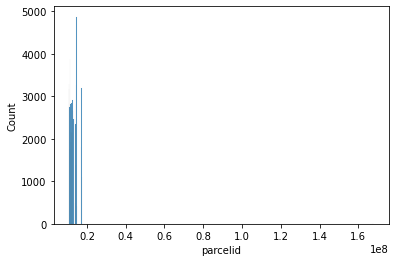

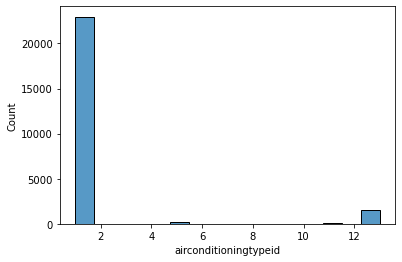

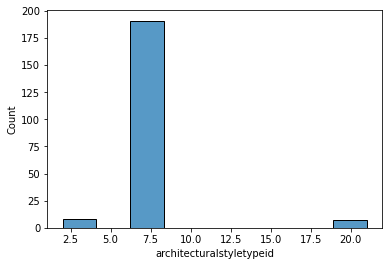

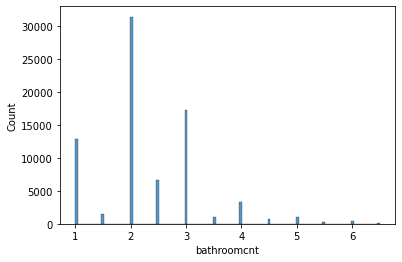

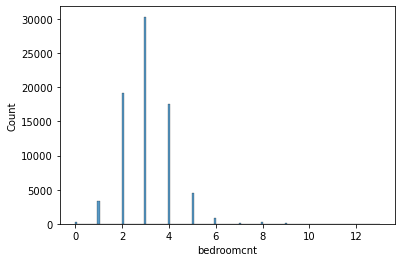

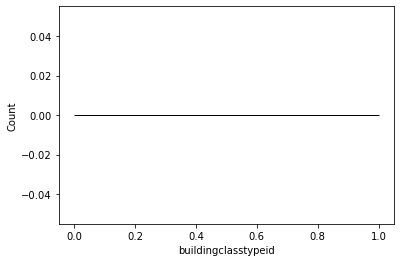

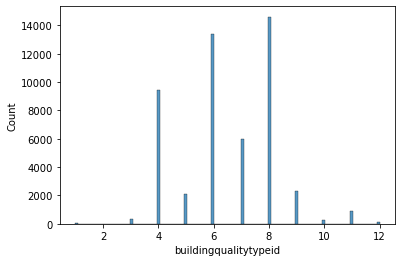

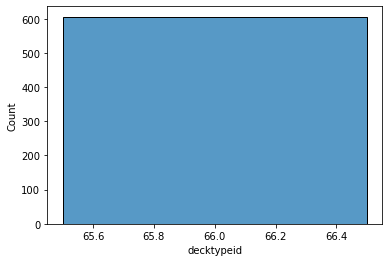

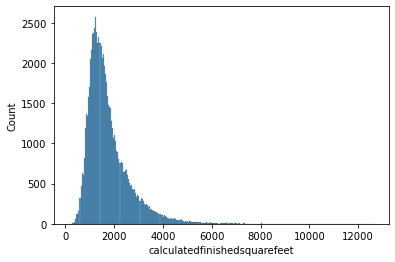

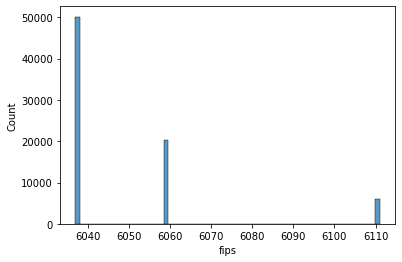

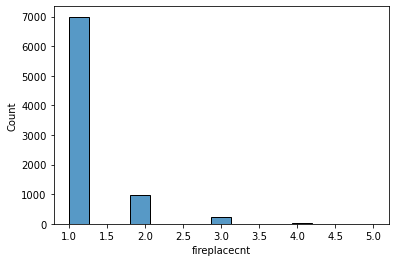

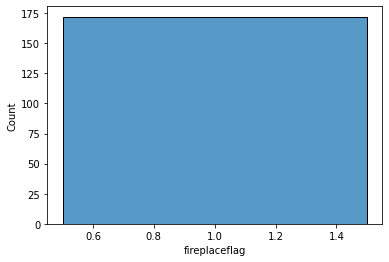

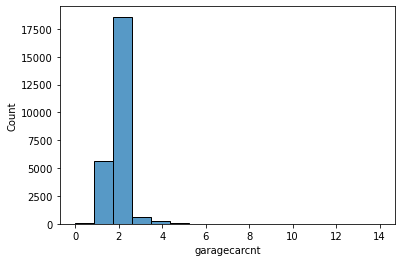

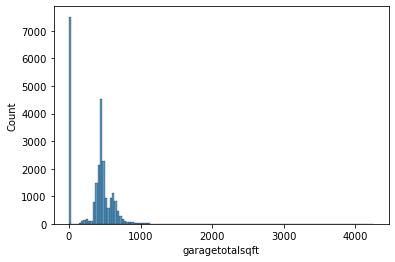

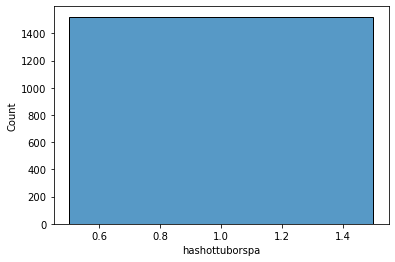

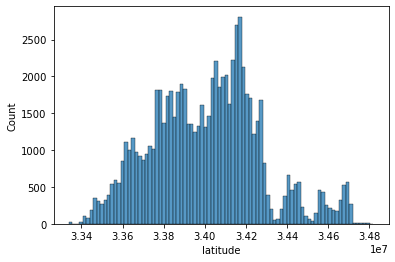

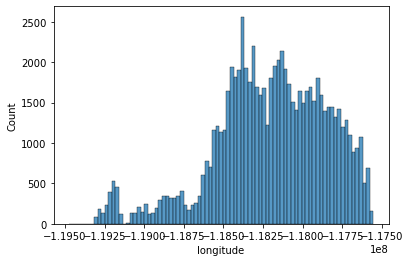

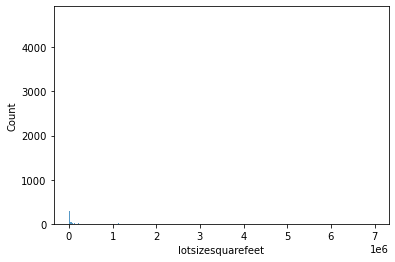

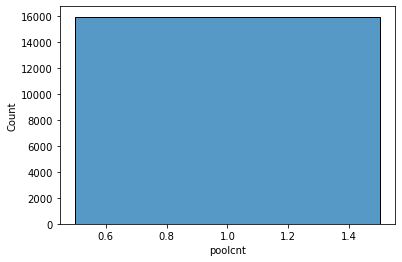

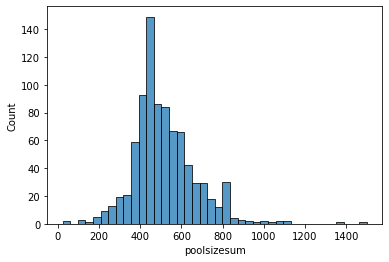

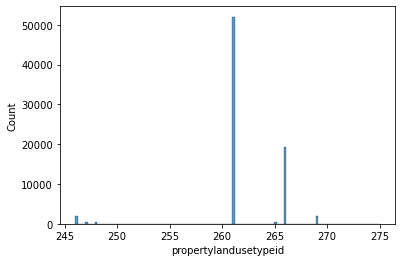

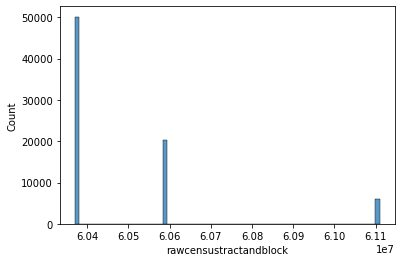

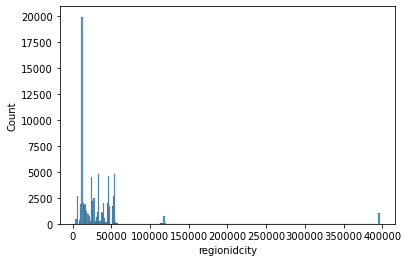

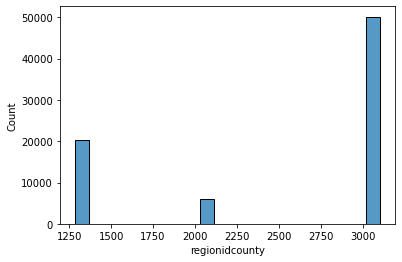

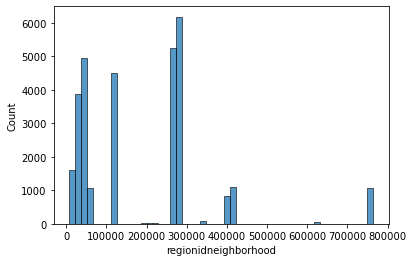

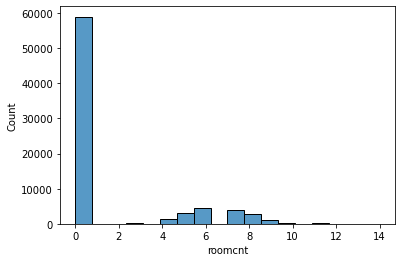

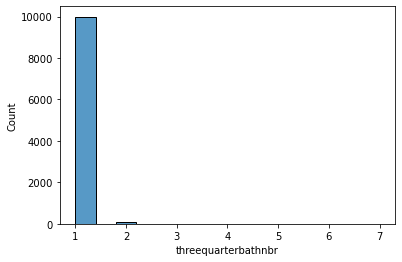

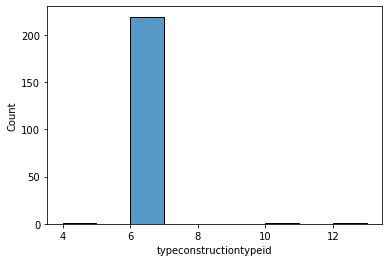

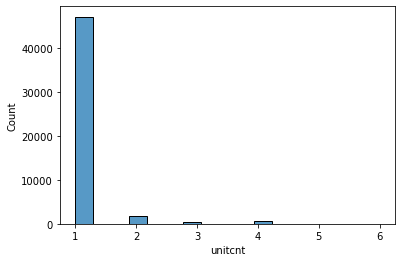

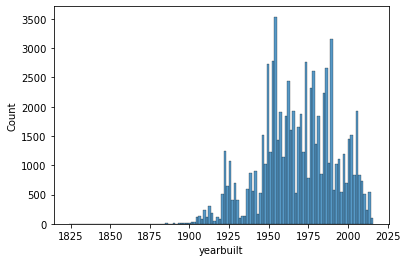

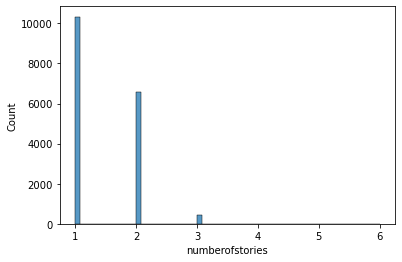

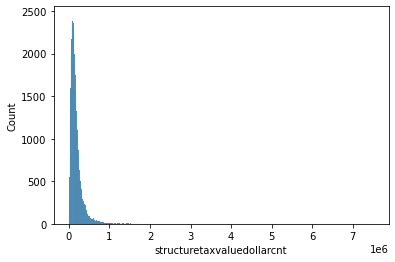

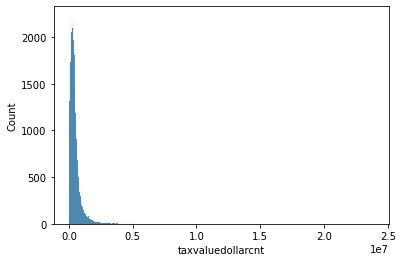

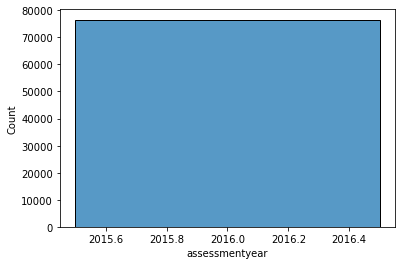

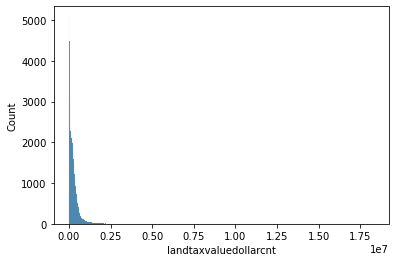

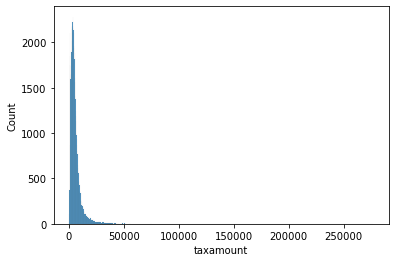

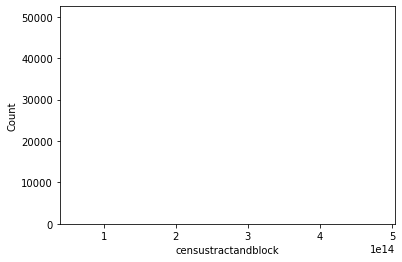

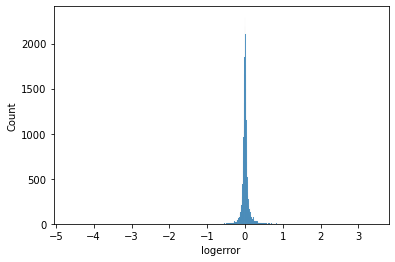

In [16]:
#collect numeric columns 
numerical_columns = [col for col in zillow.columns if col in zillow.select_dtypes(include = ["number"])]
for col in numerical_columns:
    sns.histplot(zillow[col])
    plt.show()


#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [19]:
def nulls_by_col(df):
    num_rows_missing = df.isnull().sum()
    pct_rows_missing = df.isnull().sum() / df.shape[0] * 100
    cols_missing = pd.DataFrame({
        "num_rows_missing" : num_rows_missing ,
        " pct_rows_missing" : pct_rows_missing
    })
    return cols_missing

In [13]:
nulls_by_col(zillow)

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
airconditioningtypeid,52427,67.752649
airconditioningdesc,52427,67.752649
architecturalstyletypeid,77174,99.733781
architecturalstyledesc,77174,99.733781
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77365,99.980615
buildingclassdesc,77365,99.980615
buildingqualitytypeid,27709,35.808995


In [14]:
def nulls_by_rows(df):
    num_missing = df.isnull().sum(axis =1)
    pct_missing = (num_missing / df.shape[1]) * 100
    missing_values = pd.DataFrame({"num_missing":num_missing, "pct_missing":pct_missing})\
                    .reset_index().groupby(["num_missing","pct_missing"]).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return missing_values

In [15]:
nulls_by_rows(zillow)

,num_missing,pct_missing,num_rows
0,9,19.565217391304348,2
1,10,21.73913043478261,10
2,11,23.91304347826087,23
3,12,26.08695652173913,62
4,13,28.26086956521739,114
5,14,30.434782608695656,416
6,15,32.608695652173914,5577
7,16,34.78260869565217,10549
8,17,36.95652173913043,14385
9,18,39.130434782608695,21032


In [ ]:
#some columns have really high number of nulls
#we will create a function and set thresholds

### Prepare

#### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [16]:
zillow.propertylandusedesc.value_counts()

Single Family Residential                     52319
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [5]:
#we are goning to define single homes as property which 1 main entrance door
single_home = ['Single Family Residential', 'Condominium', 
               'Townhouse', 'Manufactured, Modular, Prefabricated Homes', 
               'Mobile Home']
zillow = zillow[zillow.propertylandusedesc.isin(single_home)]

In [6]:
#what is the new shape?
zillow.shape

(71751, 46)

In [7]:
#peek at unit count
zillow.unitcnt.value_counts(dropna = False)

1.0    45286
NaN    26429
2.0       32
3.0        3
6.0        1
Name: unitcnt, dtype: int64

In [8]:
zillow = zillow[(zillow.unitcnt == 1 )|(zillow.unitcnt.isna())]

In [22]:
zillow.shape

(71715, 46)

In [ ]:
#lets make a function and transfer it to py file
def get_single_unit(zillow):
    single_home = ['Single Family Residential', 'Condominium', 
               'Townhouse', 'Manufactured, Modular, Prefabricated Homes', 
               'Mobile Home']
    zillow = zillow[zillow.propertylandusedesc.isin(single_home)]
    
    zillow = zillow[(zillow.unitcnt == 1 )|(zillow.unitcnt.isna())]
    
    return zillow

#### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [9]:
def handle_missing_values(df,prop_required_columns,prop_required_row):
    threshold = int(round(prop_required_columns * len(df.index),0))
    df = df.dropna(axis = 1 , thresh = threshold)
    threshold = int(round(prop_required_row * len(df.columns),0 ))
    df = df.dropna(axis = 0, thresh = threshold)
    return df

In [10]:
zillow = handle_missing_values(zillow, prop_required_columns = .6 , prop_required_row = .75 )

In [11]:
zillow.shape


(71712, 27)

[]

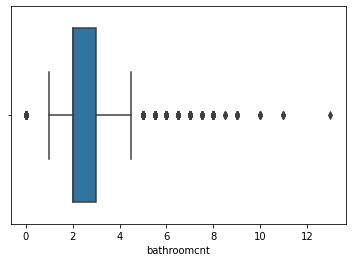

In [12]:
#lets see about ourtliers 
sns.boxplot(zillow.bathroomcnt)
plt.plot()

[]

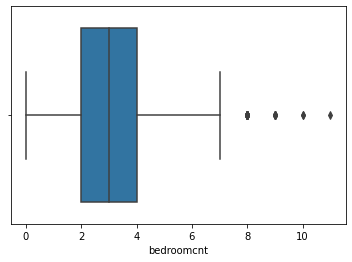

In [13]:
sns.boxplot(zillow.bedroomcnt)
plt.plot()

In [14]:
zillow = zillow[(zillow.bedroomcnt > 0) & (zillow.bedroomcnt < 9)]

In [15]:
zillow = zillow[(zillow.bathroomcnt > 0) & (zillow.bathroomcnt < 7.0)]

In [17]:
zillow.shape

(71054, 27)

In [20]:
nulls_by_col(zillow)

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,26442,37.213950
calculatedfinishedsquarefeet,10,0.014074
fips,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
lotsizesquarefeet,8018,11.284375
propertycountylandusecode,0,0.000000


<AxesSubplot:xlabel='roomcnt'>

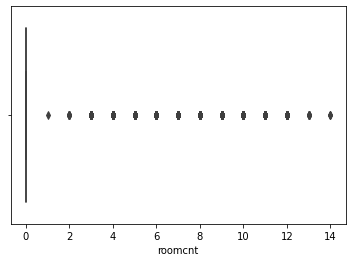

In [21]:
sns.boxplot(zillow.roomcnt)

In [7]:
zillow.roomcnt.value_counts()

0.0     59807
6.0      4513
7.0      3838
5.0      3016
8.0      2872
4.0      1415
9.0      1193
10.0      339
3.0       211
11.0      108
12.0       35
2.0        15
13.0       10
14.0        6
1.0         1
15.0        1
Name: roomcnt, dtype: int64

## Mall Customers

### 1. Acquire data from the customers table in the mall_customers database.

In [ ]:
mall = wrangle_mall.get_mall_data()

In [ ]:
mall.head()

### 2. Summarize the data (include distributions and descriptive statistics)

In [ ]:
mall.select_dtypes(include = ['int64']).head()

In [ ]:
def summary_mall_data(df):
    print("dataframe head")
    print()
    print(df.head())
    print()
    print("dataframe info")
    print()
    print(df.info())
    print()
    print("describe dataframe")
    print()
    print(df.describe().T)
    print()
    numerical_col = [col for col in df.columns if col in df.select_dtypes(include = ["number"])]
    categorical_col = [col for col in df.columns if col in df.select_dtypes(include = ["object"])]
    for col in df.columns:
        print("column name:", col)
        if col in categorical_col:
            print (df[col].value_counts())
            print()
        else:
            print (df[col].value_counts(bins = 10))
            print()

In [ ]:
summary_mall_data(mall)